In [1]:
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tbparse
from IPython.display import display
from tqdm.contrib.concurrent import process_map

### Helper functions

In [6]:
def process_df_tb(df_tb, use_vtimeloss: bool = False):
    df_tb["dps_seen"] = df_tb.step * 256  # Multiple by batch size

    tb_metric_dict: Dict[str, pd.Series] = {}
    for tag in df_tb.tag.unique():
        sdf: pd.DataFrame = df_tb[df_tb.tag == tag]  # type: ignore
        tb_metric_dict[tag] = sdf.set_index("dps_seen").value
        tb_metric_dict[tag].name = tag

    print(tb_metric_dict.keys())

    loss_components = [
        "p0loss_1",
        "p1loss_1",
        "vloss_1",
        "tdvloss_1",
        "tdsloss_1",
        "smloss_1",
        "leadloss_1",
        "sbpdfloss_1",
        "sbcdfloss_1",
        "oloss_1",
        "sloss_1",
        "fploss_1",
        "skloss_1",
        "rsdloss_1",
        "evstloss_1",
        "esstloss_1",
        "rloss_1",
        "rscloss_1",
        *(["vtimeloss_1"] if use_vtimeloss else []),
    ]
    print(
        "Not present losses:", [k for k in loss_components if k not in tb_metric_dict]
    )

    manual_total: pd.Series = sum(
        tb_metric_dict[k] for k in loss_components if k in tb_metric_dict
    )
    manual_total.name = "manual_total"
    tb_metric_dict["manual_total"] = manual_total

    return tb_metric_dict

### Load tensorboards

In [4]:
def get_df_tb(data_dir: str, predictor: bool = True) -> pd.DataFrame:
    """
    Assumes runs are not resumed so there is only a single tensorboard!
    Should probably be run with %%capture to hide output.
    """
    reader = tbparse.SummaryReader(
        f"{data_dir}/predictor/train/t0" if predictor else f"{data_dir}/train/t0",
        event_types={"scalars"},
    )
    return reader.scalars

In [7]:
%%capture
df_b6_i127 = get_df_tb(
    "/nas/ucb/tony/go-attack/weka/victimplay/full-curriculum-predictor-20220927-224321"
)
df_b10_i127 = get_df_tb("/nas/ucb/tony/go-attack/training/vpred/b10-curr-cp127-init")
df_b15_i127 = get_df_tb("/nas/ucb/tony/go-attack/training/vpred/b15-curr-cp127-init")
df_b10_i505 = get_df_tb("/nas/ucb/tony/go-attack/training/vpred/b10-curr")
df_b20_i505 = get_df_tb("/nas/ucb/tony/go-attack/training/vpred/b20-curr-cp505-init")

In [8]:
md_b6_i127 = process_df_tb(df_b6_i127)
md_b10_i127 = process_df_tb(df_b10_i127)
md_b15_i127 = process_df_tb(df_b15_i127)
md_b10_i505 = process_df_tb(df_b10_i505)
md_b20_i505 = process_df_tb(df_b20_i505)

dict_keys(['cumulative_data', 'cumulative_data_reuse', 'excessgnorm_1', 'fploss_1', 'global_step/sec', 'gnorm_1', 'leadloss_1', 'loss', 'nsamp', 'oloss_1', 'p0loss_1', 'p1loss_1', 'pacc1_1', 'pslr', 'ptentr_1', 'rloss_1', 'rscloss_1', 'rsdloss_1', 'sbcdfloss_1', 'sbpdfloss_1', 'skloss_1', 'skw', 'sloss_1', 'smloss_1', 'tdvloss_1', 'ventr_1', 'vloss_1', 'vtimeloss_1', 'wmean', 'wsum'])
Not present losses: ['tdsloss_1', 'evstloss_1', 'esstloss_1']
dict_keys(['cumulative_data', 'cumulative_data_reuse', 'esstloss_1', 'evstloss_1', 'excessgnorm_1', 'fploss_1', 'global_step/sec', 'gnorm_1', 'leadloss_1', 'loss', 'nsamp', 'oloss_1', 'p0loss_1', 'p1loss_1', 'pacc1_1', 'pslr', 'ptentr_1', 'rloss_1', 'rscloss_1', 'rsdloss_1', 'sbcdfloss_1', 'sbpdfloss_1', 'skloss_1', 'skw', 'sloss_1', 'smloss_1', 'tdsloss_1', 'tdvloss_1', 'ventr_1', 'vloss_1', 'vtimeloss_1', 'wmean', 'wsum'])
Not present losses: []
dict_keys(['cumulative_data', 'cumulative_data_reuse', 'esstloss_1', 'evstloss_1', 'excessgnorm_1'

### Plots

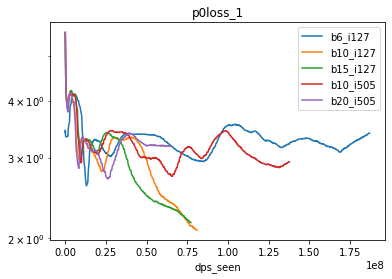

In [10]:
md_b6_i127["p0loss_1"].plot(label="b6_i127")
md_b10_i127["p0loss_1"].plot(label="b10_i127")
md_b15_i127["p0loss_1"].plot(label="b15_i127")
md_b10_i505["p0loss_1"].plot(label="b10_i505")
md_b20_i505["p0loss_1"].plot(label="b20_i505")

plt.title("p0loss_1")
plt.yscale("log")
plt.legend()
plt.show()